## What are the most demanded skills for the top 3 most popular data roles?

Methodology

1. Clean-up skill column
2. Calculate skill count based on job_title_short
3. Plot initial findings
4. Calculate skill percentage
5. Plot final findings

In [22]:
# Importing Libraries
import ast
import pandas as pd
from datasets import load_dataset
import matplotlib.pyplot as plt
import seaborn as sns

# Loading Data
dataset = load_dataset('lukebarousse/data_jobs')
df = dataset['train'].to_pandas()

# Data Cleanup
df['job_posted_date'] = pd.to_datetime(df['job_posted_date'])
df['job_skills'] = df['job_skills'].apply(lambda x: ast.literal_eval(x) if pd.notna(x) else x)

In [3]:
# Only get data analyst jobs in the UK

df_UK = df[(df['job_country'] == 'United Kingdom')]

In [4]:
df_skills = df_UK.explode('job_skills')

df_skills[['job_title', 'job_skills']]

,job_title,job_skills
15,Data Engineer,python
15,Data Engineer,sql
15,Data Engineer,power bi
45,Senior Data Analyst,sql
45,Senior Data Analyst,python
...,...,...
785642,Submission for the position: Data Engineer Sen...,qlik
785642,Submission for the position: Data Engineer Sen...,confluence
785642,Submission for the position: Data Engineer Sen...,jira
785676,Senior Data Scientist,r


In [8]:
df_skills_count = df_skills.groupby(['job_skills', 'job_title_short']).size()

df_skills_count = df_skills_count.reset_index(name='skill_count')

df_skills_count.sort_values(by='skill_count', ascending=False, inplace=True)

df_skills_count

,job_skills,job_title_short,skill_count
1163,sql,Data Engineer,7050
915,python,Data Engineer,6462
916,python,Data Scientist,6329
88,azure,Data Engineer,4865
1162,sql,Data Analyst,4467
...,...,...,...
1368,vue.js,Software Engineer,1
1367,vue.js,Senior Data Engineer,1
514,javascript,Machine Learning Engineer,1
551,julia,Software Engineer,1


In [10]:
# Getting the three top most job_title_shorts in the United Kingdom

job_titles = df_skills_count['job_title_short'].unique().tolist()

job_titles = sorted(job_titles[:3])

job_titles

['Data Analyst', 'Data Engineer', 'Data Scientist']

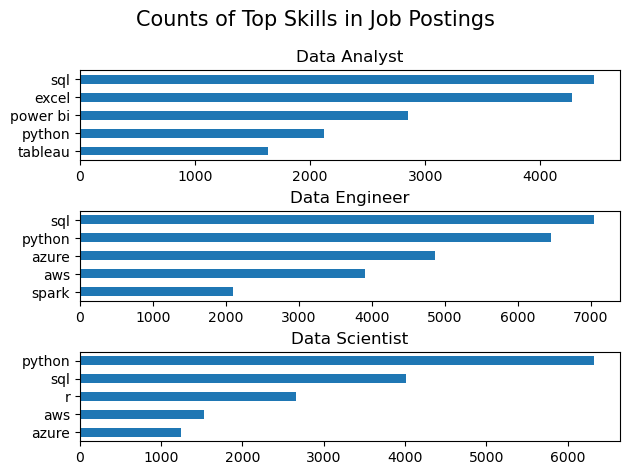

In [12]:
# Plotting the top three most job title shorts in the UK

fig, ax = plt.subplots(len(job_titles), 1)

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_count[df_skills_count['job_title_short'] == job_title].head(5)
    df_plot.plot(kind='barh', x='job_skills', y='skill_count', ax=ax[i], title=job_title)
    ax[i].invert_yaxis()
    ax[i].set_ylabel('')
    ax[i].legend().set_visible(False)

fig.suptitle('Counts of Top Skills in Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()

In [14]:
# Converting the counts of top skills in job postings into percentage %

df_job_title_count = df_UK['job_title_short'].value_counts().reset_index(name='jobs_total')

In [19]:
# Merging the two df

df_skills_perc = pd.merge(df_skills_count, df_job_title_count, how='left', on='job_title_short')

df_skills_perc['skill_percent'] = 100 * df_skills_perc['skill_count']/df_skills_perc['jobs_total']

df_skills_perc

,job_skills,job_title_short,skill_count,jobs_total,skill_percent
0,sql,Data Engineer,7050,11807,59.710341
1,python,Data Engineer,6462,11807,54.730245
2,python,Data Scientist,6329,9148,69.184521
3,azure,Data Engineer,4865,11807,41.204370
4,sql,Data Analyst,4467,10482,42.615913
...,...,...,...,...,...
1414,vue.js,Software Engineer,1,541,0.184843
1415,vue.js,Senior Data Engineer,1,3337,0.029967
1416,javascript,Machine Learning Engineer,1,317,0.315457
1417,julia,Software Engineer,1,541,0.184843


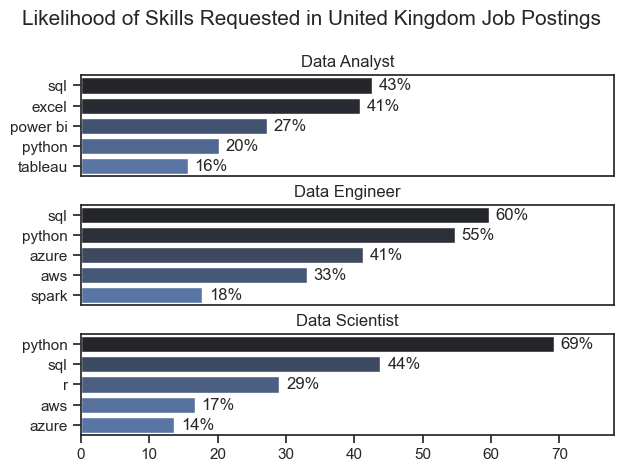

In [38]:
# Plotting using the percentage values for likelihood using Seaborn

fig, ax = plt.subplots(len(job_titles), 1)
sns.set_theme(style='ticks')

for i, job_title in enumerate(job_titles):
    df_plot = df_skills_perc[df_skills_perc['job_title_short'] == job_title].head(5)
    sns.barplot(data=df_plot, x='skill_percent', y='job_skills', ax=ax[i], hue='skill_count', palette='dark:b_r')
    ax[i].set_title(job_title)
    ax[i].set_xlabel('')
    ax[i].set_ylabel('')
    ax[i].get_legend().remove()
    ax[i].set_xlim(0, 78)

    for n, v in enumerate(df_plot['skill_percent']):
        ax[i].text(v + 1, n, f'{v:.0f}%', va='center')

    if i != len(job_titles) - 1:
        ax[i].set_xticks([])

fig.suptitle('Likelihood of Skills Requested in United Kingdom Job Postings', fontsize=15)
fig.tight_layout(h_pad=0.5) # fix the overlap
plt.show()